In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:

# Load the dataset
data = pd.read_csv("C:/Users/rajendra/Downloads/airline/train.csv")


In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.shape

(50868, 25)

In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             157
satisfaction    

In [7]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [8]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50868.000000,50711.000000
mean,25433.500000,64897.170520,39.314205,1182.259240,2.732071,3.063930,2.753971,2.971731,3.205001,3.246796,3.440827,3.356511,3.381831,3.345129,3.631713,3.312534,3.640521,3.288472,14.852894,15.215003
std,14684.471083,37391.725398,15.099875,994.557572,1.332413,1.528994,1.401268,1.281066,1.333746,1.352085,1.320434,1.333978,1.288009,1.313103,1.180810,1.263933,1.175538,1.316274,37.639251,38.204467
min,0.000000,2.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12716.750000,32676.250000,27.000000,409.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,25433.500000,64711.500000,40.000000,834.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,38150.250000,97318.250000,51.000000,1734.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,50867.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [9]:
data.duplicated().sum()

0

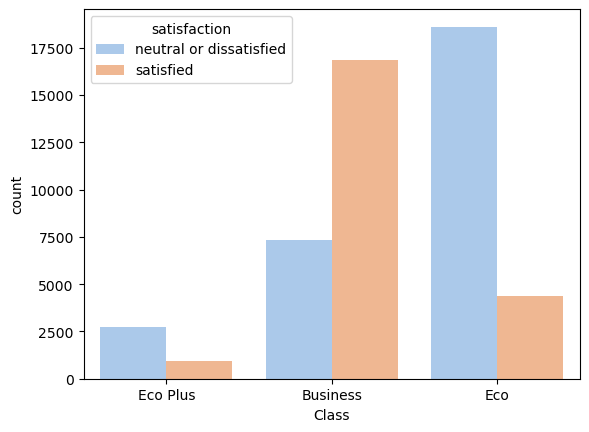

In [11]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "pastel", data = data)
plt.show()

satisfaction
neutral or dissatisfied    28724
satisfied                  22144
Name: count, dtype: int64


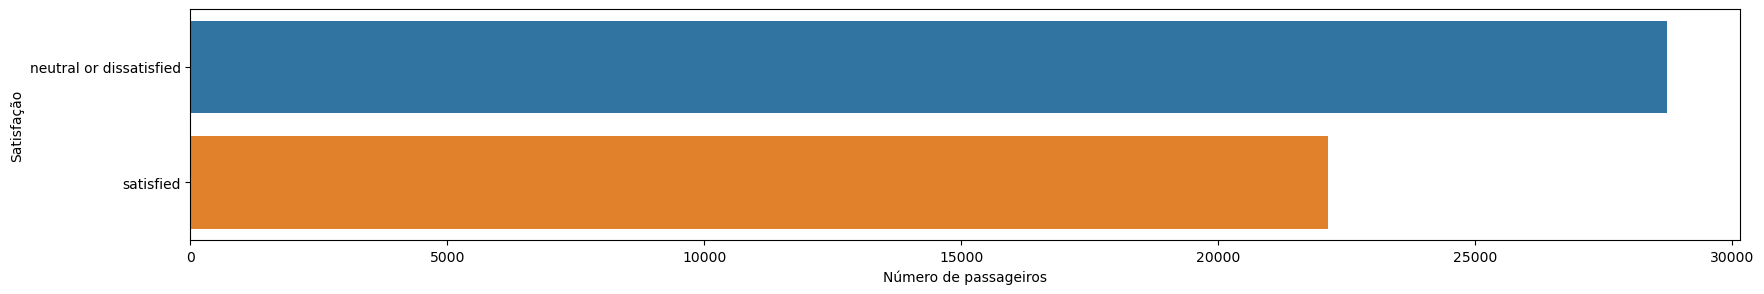

In [12]:
fig = plt.figure(figsize=(20,3))
ax = sns.countplot(y='satisfaction', data=data)
ax.set(ylabel='Satisfação', xlabel='Número de passageiros')
print(data.satisfaction.value_counts())

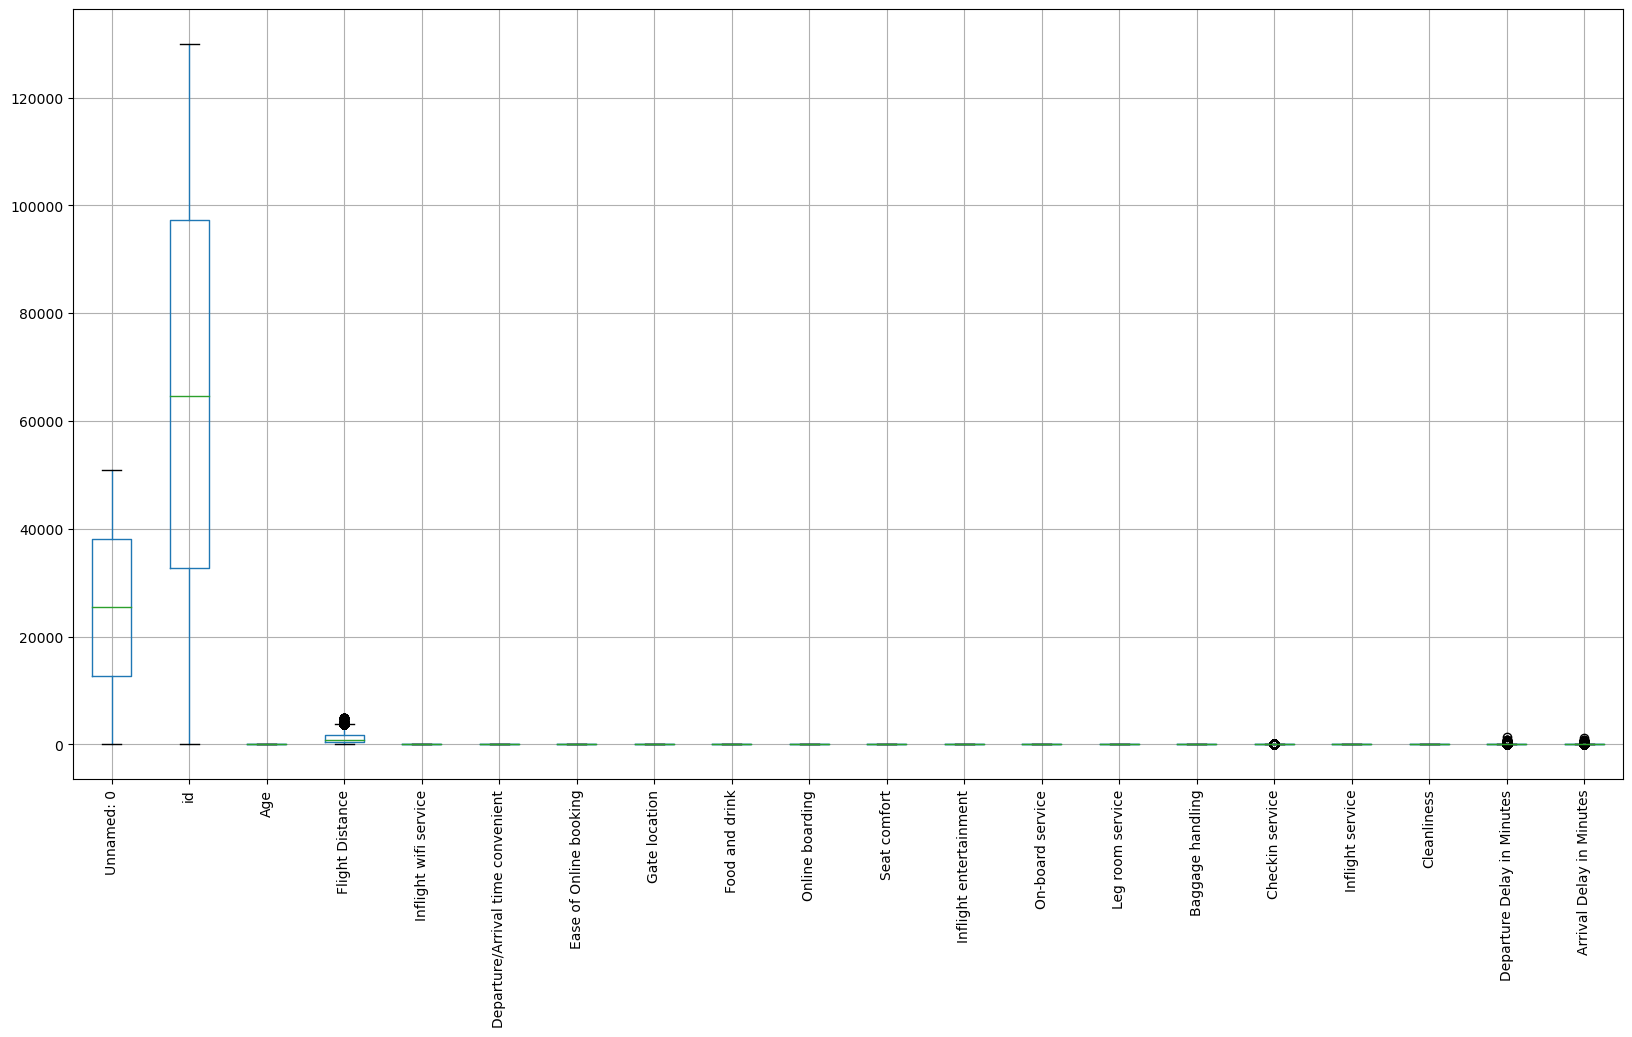

In [13]:
import matplotlib.pyplot as plt

# Plot box plots for each feature
data.boxplot(figsize=(20, 10))
plt.xticks(rotation=90)
plt.show()


In [14]:

# Example preprocessing steps
# Convert categorical columns to numeric
categorical_columns = ['Gender','Customer Type' ,'Type of Travel' ,'Class']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [15]:

# Drop unnecessary columns

data = data.drop(data.columns[[0,1]], axis=1) 
# Fill or drop missing values
data.dropna(inplace=True)

In [16]:

# Define features and target
X = data.drop(columns=['satisfaction'])
y = data['satisfaction']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log_reg))
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log_reg))


C:\Users\rajendra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.86
Logistic Regression Confusion Matrix:
[[5045  646]
 [ 748 3704]]
Logistic Regression Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.89      0.88      5691
              satisfied       0.85      0.83      0.84      4452

               accuracy                           0.86     10143
              macro avg       0.86      0.86      0.86     10143
           weighted avg       0.86      0.86      0.86     10143



In [18]:

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.96
Random Forest Confusion Matrix:
[[5527  164]
 [ 280 4172]]
Random Forest Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.97      0.96      5691
              satisfied       0.96      0.94      0.95      4452

               accuracy                           0.96     10143
              macro avg       0.96      0.95      0.96     10143
           weighted avg       0.96      0.96      0.96     10143



In [19]:

# Compare models
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Logistic Regression Accuracy: 0.86
Random Forest Accuracy: 0.96


In [20]:
import joblib
# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']